In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact

In [11]:
plt.rcParams['figure.dpi'] = 100

# Interactively exploring $\chi^2$

## Model $y=a$ 

In [3]:
# Generate data

N = 100
x = np.linspace(0,1,N)
y = np.random.normal(size=len(x))+2

# A sweep of model parameter and calculating chi2

Npar = 100
a_range = 3
a_val = 2
a1 = a_val-a_range/2
a2 = a_val+a_range/2
a = np.linspace(a1, a2,Npar)

chi2 = np.zeros(len(a))

# this could be vectorized, but in a loop here for clarity
for i in range(len(a)):
    chi2[i] = np.sum((a[i]-y)**2)/len(y)
    
ym = np.outer(a,np.ones(len(x)))
    
# Now interactive plots

def update(i=0):
    plt.subplots(figsize=(12,7))
    plt.subplot(221)
    plt.plot(x,y, label="Data")
    plt.plot(x,ym[i], label="Model $y = b$")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.subplot(222)
    plt.plot(a,chi2)
    plt.plot(a[i], chi2[i], 'o')
    plt.xlabel("Model parameter $b$")
    plt.ylabel("$\chi^2$")
    plt.subplot(223)
    plt.plot(x,y-ym[i])
    plt.axhline(0,ls=':', c='grey')
    plt.xlabel("x")
    plt.ylabel("Residual value")
    plt.subplot(224)
    plt.hist(y-ym[i], bins=50)
    plt.xlim(-10,10)
    plt.axvline(0,ls=':', c='grey')
    plt.xlabel("Residual value")
    plt.ylabel("Histogram count")
    
interact(update, i=(0,len(a)-1,5));

interactive(children=(IntSlider(value=0, description='i', max=99, step=5), Output()), _dom_classes=('widget-in…

## Model $y = ax$

In [4]:
# Generate data

N = 100
x = np.linspace(0,1,N)
y = np.random.normal(size=len(x))+10*x

# A sweep of model parameter and calculating chi2

Npar = 100
a_range = 20
a_val = 10
a1 = a_val-a_range/2
a2 = a_val+a_range/2
a = np.linspace(a1, a2,Npar)

chi2 = np.zeros(len(a))

# this could be vectorized, but in a loop here for clarity
for i in range(len(a)):
    chi2[i] = np.sum((a[i]*x-y)**2)/len(y)
    
ym = np.outer(a,x)
    
# Now interactive plots

def update(i=0):
    plt.subplots(figsize=(12,7))
    plt.subplot(221)
    plt.plot(x,y, label="Data")
    plt.plot(x,ym[i], label="Model $y = b$")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.subplot(222)
    plt.plot(a,chi2)
    plt.plot(a[i], chi2[i], 'o')
    plt.xlabel("Model parameter $b$")
    plt.ylabel("$\chi^2$")
    plt.subplot(223)
    plt.plot(x,y-ym[i])
    plt.axhline(0,ls=':', c='grey')
    plt.xlabel("x")
    plt.ylabel("Residual value")
    plt.subplot(224)
    plt.hist(y-ym[i], bins=50)
    plt.xlim(-15,15)
    plt.axvline(0,ls=':', c='grey')
    plt.xlabel("Residual value")
    plt.ylabel("Histogram count")
    
interact(update, i=(0,len(a)-1,5));

interactive(children=(IntSlider(value=0, description='i', max=99, step=5), Output()), _dom_classes=('widget-in…

#  Fitting

## Model  $y = a$

Goal: 

* Genereate a dataset with error from a model
* Fit the model with `curve_fit` and extract parameter errors
* Take a look at the fitted value and the error values a plot of $\chi^2$


In [357]:
def make_plots(N):
    # Generate data
    x = np.linspace(0,1,N)
    y = np.random.normal(size=len(x))*2+2

    # A sweep of model parameter and calculating chi2

    Npar = 100
    a_range = 3
    a_val = 2
    a1 = a_val-a_range/2
    a2 = a_val+a_range/2
    a = np.linspace(a1, a2,Npar)

    for i in range(len(a)):
        chi2[i] = np.sum((a[i]-y)**2)/len(y)

    # Now perform a least squares fit

    def f(x,a):
        return a

    val,cov = curve_fit(f,x,y)

    a_fit = val[0]
    a_err = np.sqrt(cov[0,0])

    print("Fitted value of a", a_fit)
    print("Error on a:", a_err)

    plt.subplots(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x,y)
    plt.plot(x,a_fit*np.ones(len(x)))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(122)
    plt.plot(a,chi2,'.-')
    plt.axvline(a_fit, ls=':', c='black')
    plt.axvline(a_fit-a_err, ls=':', c='grey')
    plt.axvline(a_fit+a_err, ls=':', c='grey')
    plt.axvline(a_fit-2*a_err, ls=':', c='grey')
    plt.axvline(a_fit+2*a_err, ls=':', c='grey')
    plt.xlabel("a")
    plt.ylabel("$\chi^2$")
    plt.show()

Fitted value of a 1.8576205999611712
Error on a: 0.21342476538366098


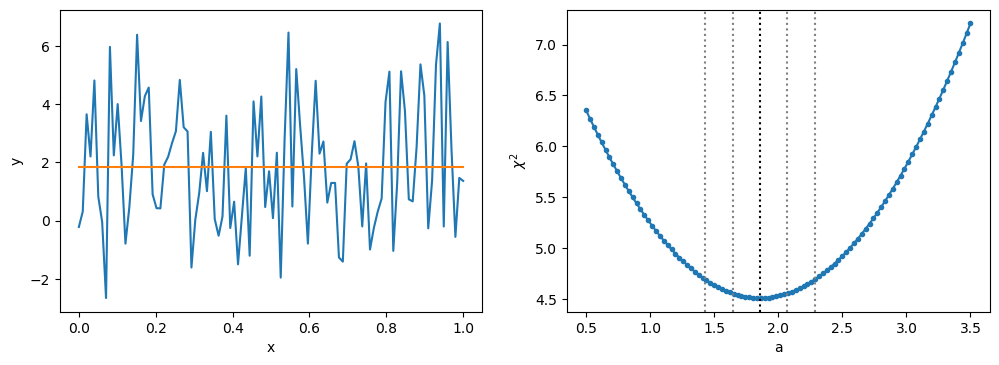

In [358]:
make_plots(100)

On the right plot, the black dashed line shows the fitted value of $a$ for this data set. The closer set of dashed grey lines show the $1\sigma$ error band, and the second set of dashed grey lines show the $2\sigma$ error band. 

Of course, we know the "correct" value of $a$ to be 2. But the fitted value is not always 2, of course, because of the noise and the small number of data points. 

But: is the fitted value "equal" to the true value to within the "error margin"? 

If you re-run the cell, it will generate a different set of random noise and perform the fit again. Try re-running it a bunch of times. How often does the fitted value "not agree" (to within $1\sigma$) with the true value? 

*(Answer: the $1\sigma$ error criterion says that the fitted value and true value should "agree" 66% of the time. Which means that 33% of the time, one time in three, they should not "agree"! If you take the outer set of lines, the $2\sigma$ error band, then they should "agree" 90% of the time, meaning that on average, only one time out of 10, the value 2 will fall outside the second set of grey lines.)*

If we add more points, we can see that our error margins will get smaller, but that the same should hold as above: the true value will fall outside of the $1\sigma$ error band of the fitted value 1/3 of the time.

Fitted value of a 1.9913508622353073
Error on a: 0.0635926642870972


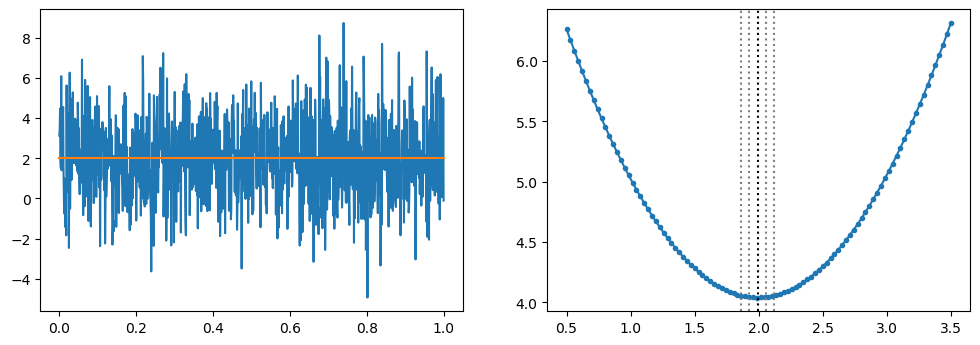

In [131]:
make_plots(1000)

# Error vs number of points

Does it give what you would expect? 

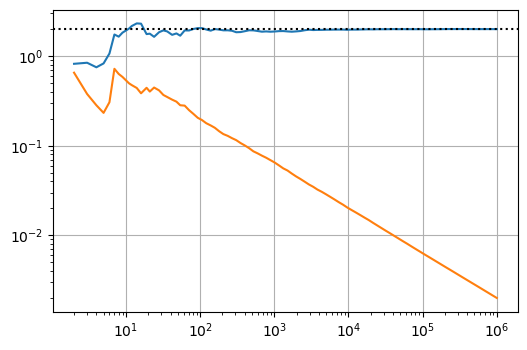

In [352]:
# Generate data
Nmax = 1e6
x = np.linspace(0,1,int(Nmax))
y = np.random.normal(size=len(x))*2+2

N = np.geomspace(2,Nmax,100).astype(int)

val = np.zeros(len(N))
err = np.zeros(len(N))

def f(x,a):
    return a

for i in range(len(N)):
    n = N[i]
    v,e = curve_fit(f,x[0:n],y[0:n])
    val[i] = v[0]
    err[i] = np.sqrt(e[0,0])

plt.plot(N,val)
plt.plot(N,err)
plt.axhline(2,ls=':', c='black')
plt.xscale('log')
plt.yscale('log')

plt.grid()

# Fitting filtered data: "Moving average" vs. "Bin average"

Is this fair? 

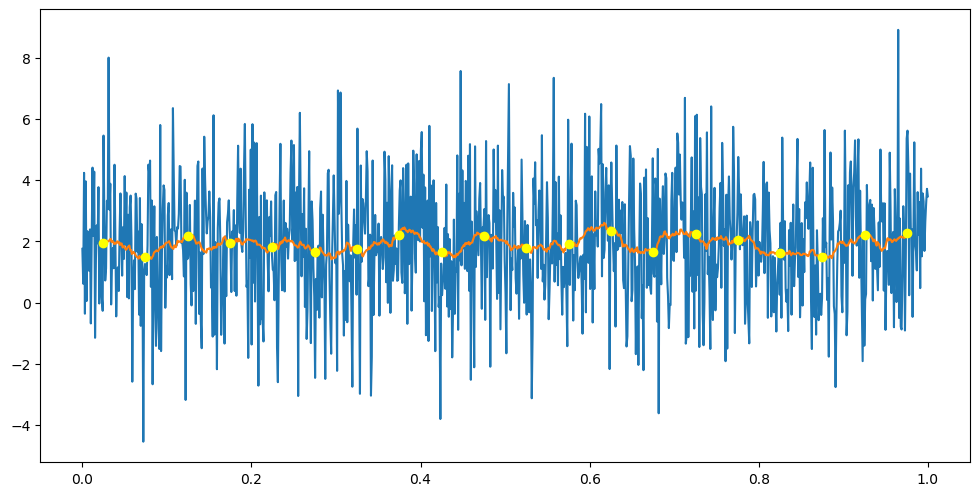

Val    1.919
Val MA 1.905
Val BA 1.919

Err    0.062
Err MA 0.008
Err BA 0.062


In [311]:
# Generate data
Nmax = 1000
x = np.linspace(0,1,int(Nmax))
y = np.random.normal(size=len(x))*2+2

Nf = 50

def moving_average(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

x_ma  = moving_average(x,Nf)
y_ma = moving_average(y,Nf)

def bin_average(x, N):
    x2 = x[0:len(x)//N*N]
    x2 = np.reshape(x2,[len(x2)//N,N])
    return np.average(x2,axis=1)

x_ba = bin_average(x,Nf)
y_ba = bin_average(y,Nf)

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.plot(x_ma,y_ma)
plt.plot(x_ba,y_ba,'o',c='yellow')
plt.show()

val,cov = curve_fit(f,x,y)
val_ma,cov_ma = curve_fit(f,x_ma,y_ma)
val_ba,cov_ba = curve_fit(f,x_ba,y_ba)

dec =  3
print("Val   ", round(val[0],dec))
print("Val MA", round(val_ma[0],dec))
print("Val BA", round(val_ba[0],dec))
print()
print("Err   ", round(np.sqrt(cov[0,0]),dec))
print("Err MA", round(np.sqrt(cov_ma[0,0]),dec))
print("Err BA", round(np.sqrt(cov_ba[0,0]),dec))

Naughty cheater!

# `curve_fit` with error bars

What happens if we try to give error bars to the curve fit function? 

Interestingly, if I understand correctly, as long as the error bars all have the same value, the actual value of the error bars we specify should not affect the resulting fit parameter error AT ALL.

Let's check this. 

In [353]:
# Generate data
N = 50
x = np.linspace(0,1,int(N))
y = np.random.normal(size=len(x))*2+2

Fit name: No sigma
Fit value: 2.077489675660094
Fit error: 0.24267914037599367

Fit name: Sigma 1
Fit value: 2.077489675660094
Fit error: 0.24267914037599367

Fit name: Sigma 10
Fit value: 2.077489675995496
Fit error: 0.2426791402962482



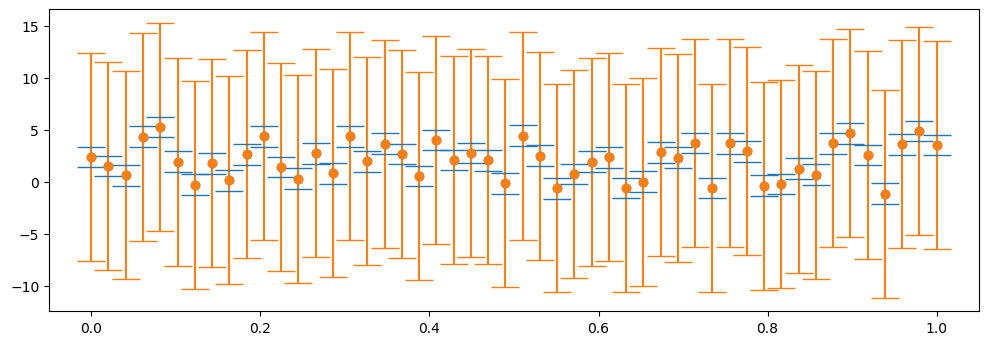

In [343]:
def print_fit(name,val,cov):
    print("Fit name:", name)
    print("Fit value:", val[0])
    print("Fit error:", np.sqrt(cov[0,0]))
    print()

val,cov = curve_fit(f,x,y)
val_1,cov_1 = curve_fit(f,x,y,sigma=np.ones(len(y)))
val_10,cov_10 = curve_fit(f,x,y,sigma=np.ones(len(y))*10)

print_fit("No sigma", val, cov)
print_fit("Sigma 1", val_1, cov_1)
print_fit("Sigma 10", val_10, cov_10)

plt.figure(figsize=(12,4))
plt.errorbar(x,y,np.ones(len(y)),capsize=10,ls='None',marker='o')
plt.errorbar(x,y,10*np.ones(len(y)),capsize=10,ls='None',marker='o')
plt.show()

## Using error bars to specify  relative error

What does feeding error bars do then? A common use of them is that the **relative** size of error bars determines the **relative** weight with which those points contribute to the fit value and error estimate. Their absolute value does not (and should not) matter since if you have a reasonable number of data points, the TRUE (statistical) error on your data points can be directly obtained by looking at the variance of the residuals.  

For example, say we suspect that our experimental apparatus gives an error that increases proportional to the x value. We could then feed in a non-uniform set of error bars: 

Fit name: Non-uniforme error
Fit value: 2.1742627747852756
Fit error: 0.21449061974131312



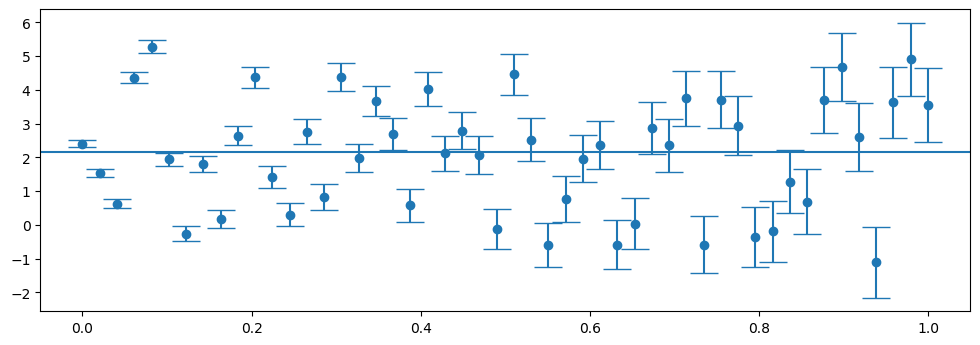

In [351]:
error = 0.1+x
val,cov = curve_fit(f,x,y,sigma=error)
print_fit("Non-uniforme error", val,  cov)


plt.figure(figsize=(12,4))
plt.errorbar(x,y,error,capsize=10,ls='None',marker='o')
plt.axhline(val[0])
plt.show()

Using these error bars, we  now get a different value of the fitted value, because our error bars are telling the fit that the points near  $x=0$ count "more" than the values near $x=1$

If you  look carefully at the data,  though, then you  can see that the assumption we have made for our error bars are not reflected in the actual statistics of our data samples! In particular, if our error was actually smaller  near $x=0$, then there would be less spread in the points, which is clearly not the case.

(and which, in this case, we know is true since we have created the noise in the data ourselves!)

**Upshot:** Be careful feeding error bars into your fit. If  you don't have to do it,  don't  do  it! And: If you do end up doing it,  make sure that the error  model you choose also is correctly reproduced  by the statistics of the samples of your data. 

##  Forcing `curve_fit` to account for your estimation of the error bars (and why  NOT to  do it!)

If somehow we have explicit knowledge that there is uncertainty in the data points that is LARGER than the actual sample variance, we can force this using `absolute_sigma=True`. In this case, the error on our fit parameters is affected by the value of the error bars we feed in:

In [346]:
val,cov = curve_fit(f,x,y)
val_1,cov_1 = curve_fit(f,x,y,sigma=np.ones(len(y)), absolute_sigma=True)
val_10,cov_10 = curve_fit(f,x,y,sigma=np.ones(len(y))*10, absolute_sigma=True)

print_fit("No sigma", val, cov)
print_fit("Sigma 1", val_1, cov_1)
print_fit("Sigma 10", val_10, cov_10)

Fit name: No sigma
Fit value: 2.077489675660094
Fit error: 0.24267914037599367

Fit name: Sigma 1
Fit value: 2.077489675660094
Fit error: 0.14142135634456818

Fit name: Sigma 10
Fit value: 2.077489675995496
Fit error: 1.4142135629809645



**BUT:** For any decent number of data points in our dataset, we should NEVER use this since the variance of the data points (or more generally, the variance of the residuals of a fit to the correct model) should give a good representation of the ACTUAL error associated with each data point. 

For example, in this case our model is that the function is just a constant value. If we assume that the error is independent of the independent variable (in this case,  $x$), then what we have is a repeated set of identical measurements, and by definition the error on a single measurement is DEFINED as the variance of this set of samples, and there is no reason to manually "add" more error.  In fact,  this is a highly  accurate way of DETERMINING your error.

For  datasets  with a reasonable number of samples (more than 10?), **it is FAR BETTER** to let `curve_fit` determine the variance for you (by leaving `absolute_sigma=False`) than manually feeding it an error the you estimate in some other way, because this  possibly  incorrect information you give it could cause it to determine an incorrect value for the uncertainty in your fit parameters. 

**Upshot:** Unless you  are really 10000% certain  about your error estimates, and maybe if you have a very small sample set of data (10 points?), **DO NOT USE** `absolute_sigma=True`. And if you really feel compelled to use it, please double-check that your estimated errors are also  well reflected by the statistics  of the samples in your dataset.